In [1]:
%matplotlib inline
# You need to have caffe installed with python support, and the BVLC reference models
# downloadad.  Please refer to the caffe website/codebase for instructions.
import caffe
import progressbar
import numpy as np
from matplotlib import pyplot as plt
caffe.set_mode_gpu()

In [2]:
def transformCurrent(current, means):
    image = (current + means).transpose(1,2,0)[:,:,0]
    image = image - image.min()
    image = image/image.max()
    return image
def oneLoop(net, target_label, IT=1000, rate_obj=1000, rate_smooth=0, means=0.3, a=1, b=0.5, endL='ip2'):
    current = np.random.rand(1,28,28)*255 - means
    act_hist = []
    prg = progressbar.ProgressBar(max_value=IT).start()
    plt.rcParams['figure.figsize'] = (20,20)
    fg = plt.figure()
    for it in range(IT):
        # do a forward pass for the current version of the image
        # and collect the target activation to visualize later
        net.blobs['data'].data[...] = current
        act_hist.append(net.forward(end=endL)[endL].flat[target_label])
        # set the topmost diff and do a backward pass back to the image
        # can also try: `np.arange(1000)==target_label`
        net.blobs[endL].diff[...].flat = a*(np.arange(10)==target_label)-b
        diff = net.backward(start=endL)['data']
        # compute smoothness regularization
        x_diff = np.zeros_like(current)
        y_diff = np.zeros_like(current)
        if np.random.rand() > 0.5:
            y_diff[:,1:,:] = (current[:,1:,:] - current[:,:-1,:])
            x_diff[:,:,1:] = (current[:,:,1:] - current[:,:,:-1])
        else:
            y_diff[:,:-1,:] = (-current[:,1:,:] + current[:,:-1,:])
            x_diff[:,:,:-1] = (-current[:,:,1:] + current[:,:,:-1])
        # gradient descent step
        current = current + rate_obj*diff[0] - rate_smooth*x_diff - rate_smooth*y_diff
        if it > 0 and it%100 == 0:
            #print 'iteration {}'.format(it)
            prg.update(it)
            sb = fg.add_subplot(10,10,it/100)
            sb.imshow(transformCurrent(current, means), cmap='gray')
            sb.set_title('it='+str(it))
    plt.show()
    '''
    plt.rcParams['figure.figsize'] = (14,3)
    axs = plt.subplot(1,2,1)
    axs.plot(act_hist)
    axs.set_title('activation')
    axs = plt.subplot(1,2,2)
    axs.plot(net.forward(end='loss')['loss'].flat)
    axs.set_title('prediction')
    plt.show()
    '''
    return transformCurrent(current, means)

In [11]:
def getAll(net, N):
    for i in range(0,10):
        yield oneLoop(net=net,target_label=i,rate_smooth=0, IT=N, endL='ip2')

def saveBatch(DIR, suffix=''):
    MNmodel = DIR + '/model.net'
    MNweight = DIR + '/para_iter_5000.caffemodel'
    net = caffe.Net(MNmodel, MNweight, 1)
    picList = [ i for i in getAll(net, 300)]
    plt.rcParams['figure.figsize'] = (10,5)
    fg = plt.figure()
    for i, pic in enumerate(picList):
        sb = fg.add_subplot(2,5,i+1)
        sb.imshow(pic, cmap='gray')
        sb.set_title(str(i))
    plt.show()
    fg.savefig(DIR+suffix+'.png')

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

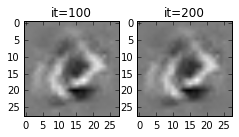

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

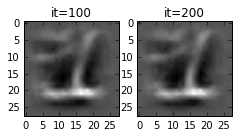

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

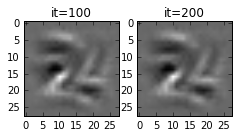

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

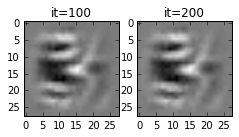

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

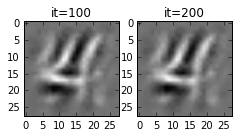

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

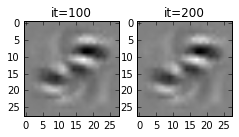

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

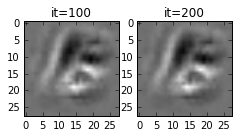

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

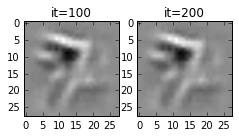

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

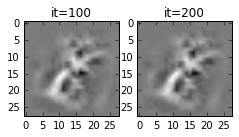

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

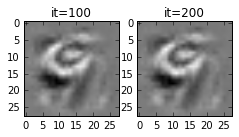

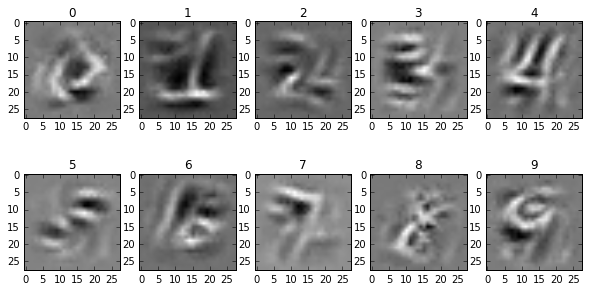

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

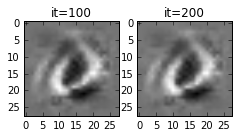

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

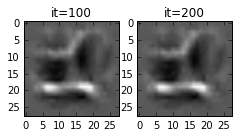

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

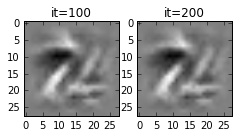

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

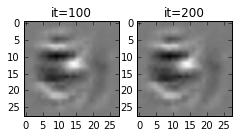

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

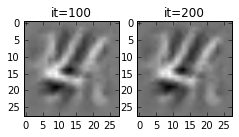

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

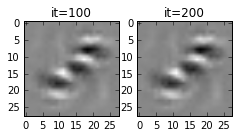

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

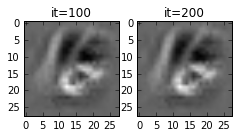

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

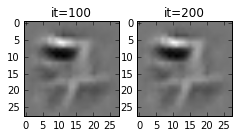

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

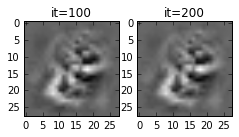

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

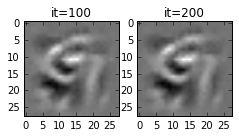

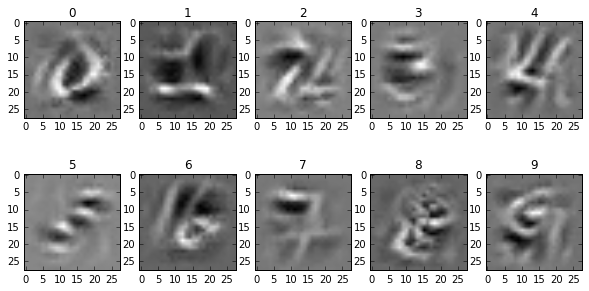

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

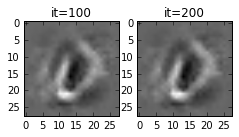

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

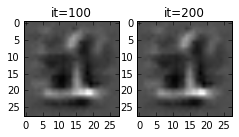

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

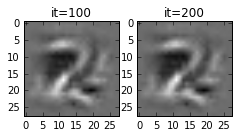

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

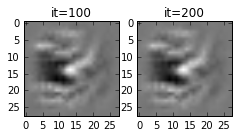

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

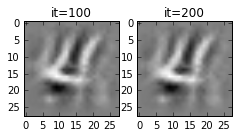

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

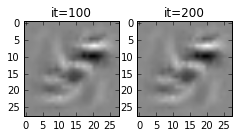

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

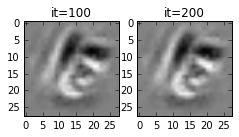

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

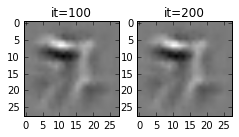

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

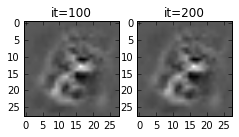

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

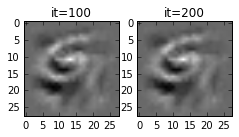

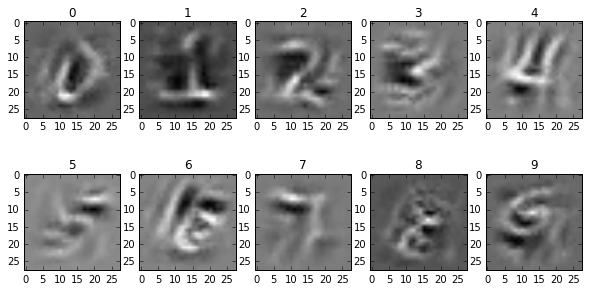

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

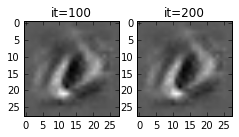

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

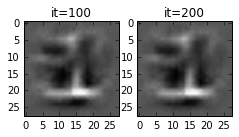

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

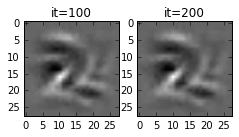

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

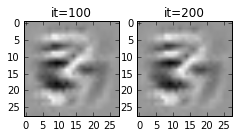

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

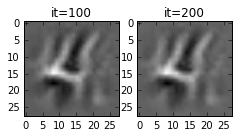

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

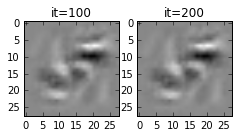

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

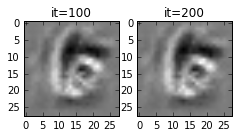

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

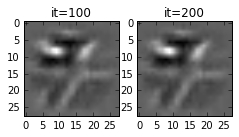

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

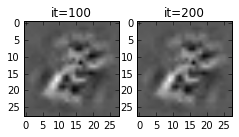

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

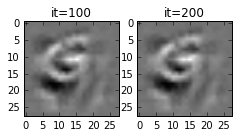

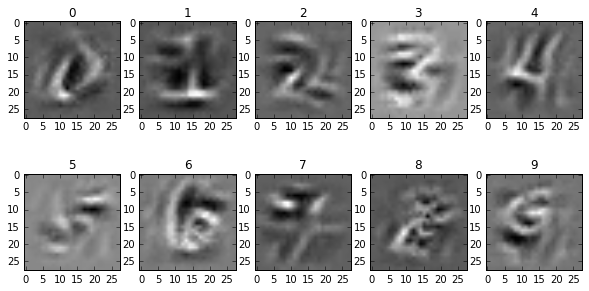

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

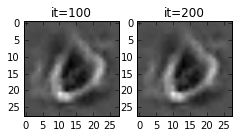

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

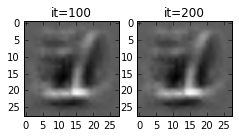

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

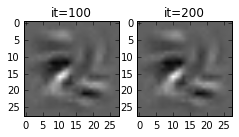

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

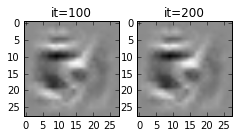

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

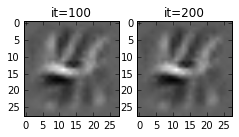

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

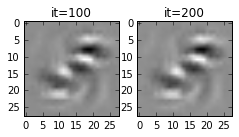

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

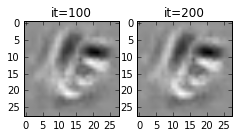

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

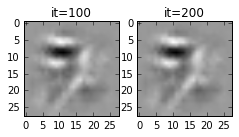

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

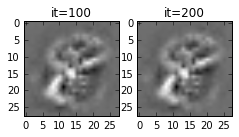

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

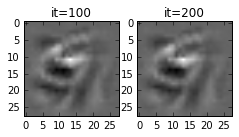

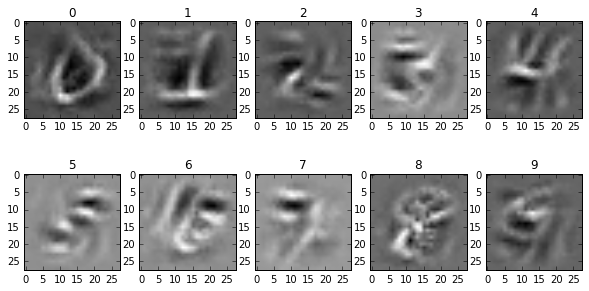

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

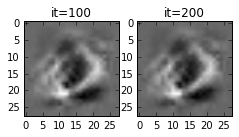

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

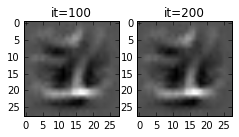

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

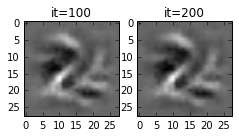

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

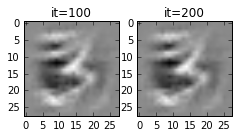

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

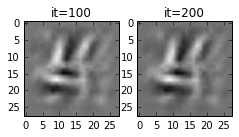

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

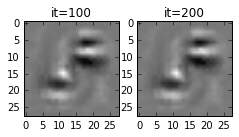

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

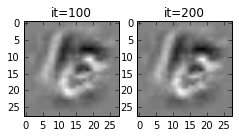

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

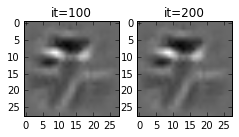

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

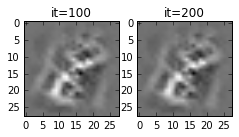

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

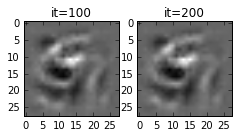

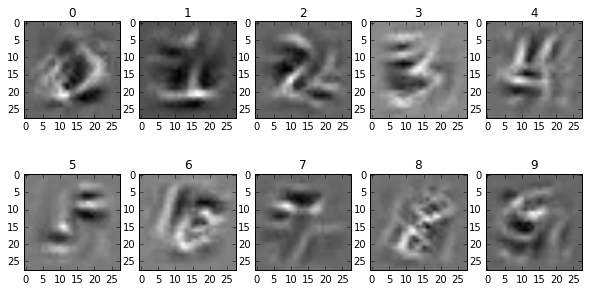

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

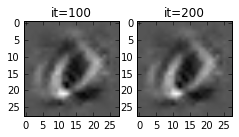

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

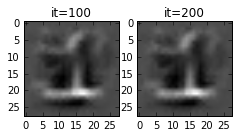

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

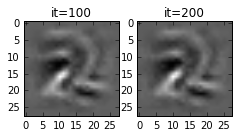

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

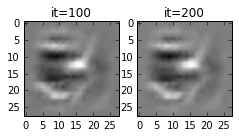

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

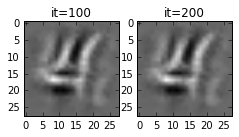

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

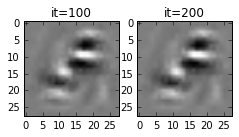

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

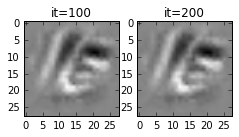

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

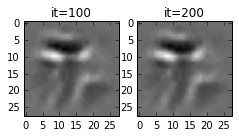

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

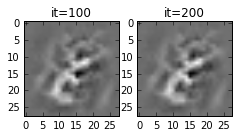

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

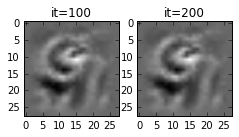

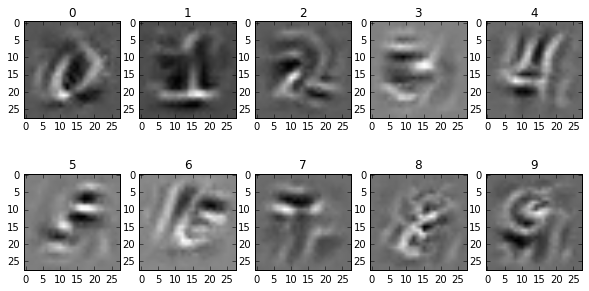

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

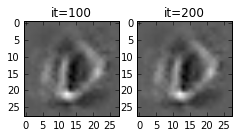

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

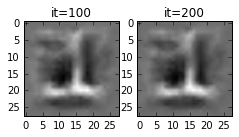

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

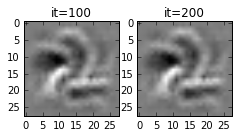

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

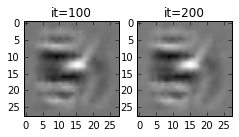

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

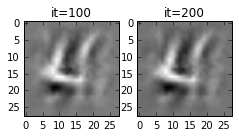

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

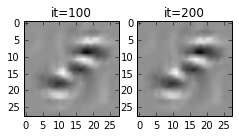

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

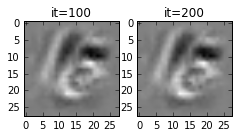

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

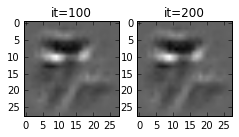

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

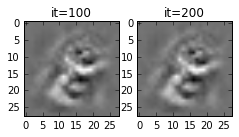

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

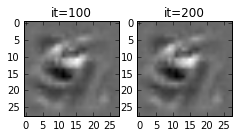

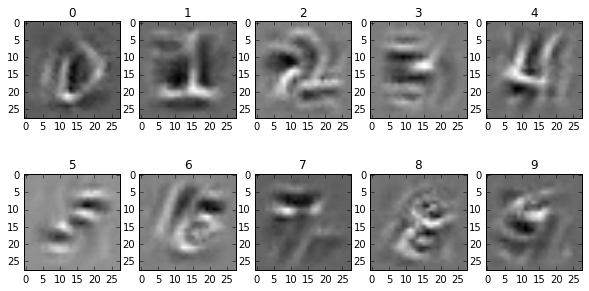

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

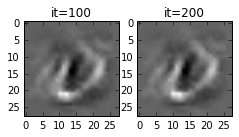

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

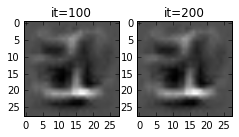

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

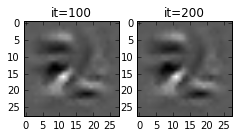

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

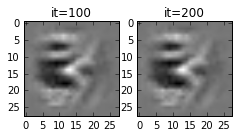

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

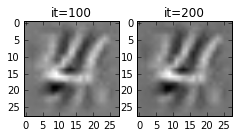

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

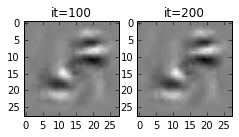

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

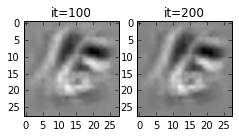

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

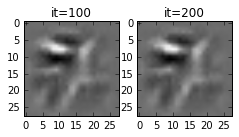

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

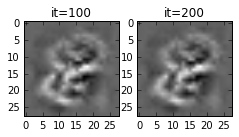

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

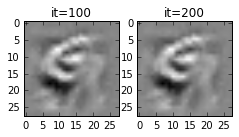

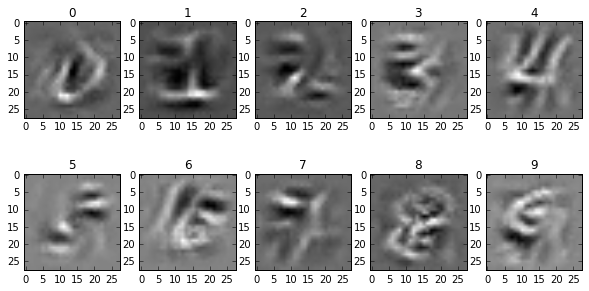

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

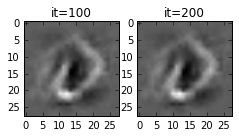

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

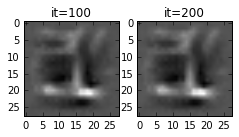

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

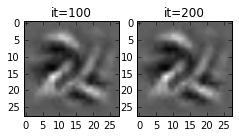

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

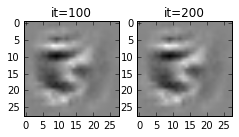

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

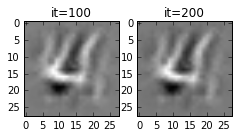

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

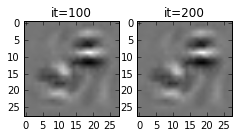

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

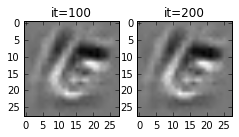

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

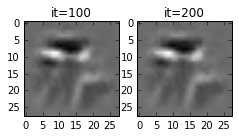

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

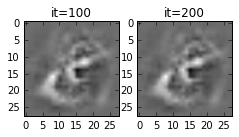

 66% (200 of 300) |##############       | Elapsed Time: 0:00:00 ETA:  0:00:00

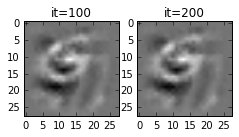

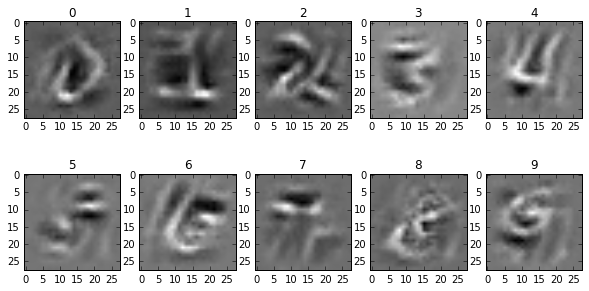

In [15]:
for i in range(10):
    saveBatch('originMnist',str(i))

 80% ( 800 of 1000) |#################     | Elapsed Time: 0:00:01 ETA:  0:00:00

smooth rate = 0.0


 90% ( 900 of 1000) |###################   | Elapsed Time: 0:00:01 ETA:  0:00:00

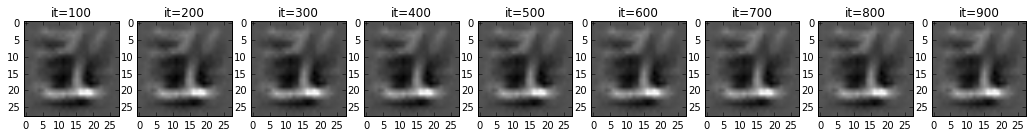

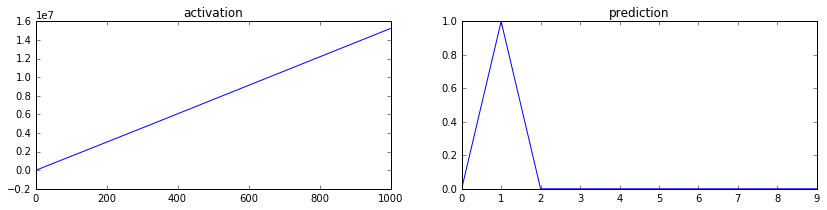

 80% ( 800 of 1000) |#################     | Elapsed Time: 0:00:01 ETA:  0:00:00

smooth rate = 0.1


 90% ( 900 of 1000) |###################   | Elapsed Time: 0:00:01 ETA:  0:00:00

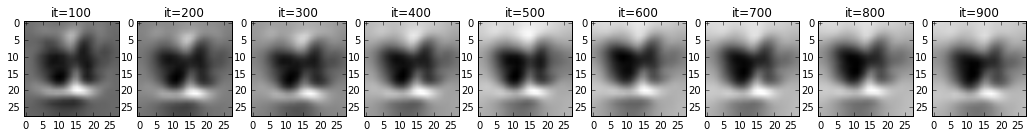

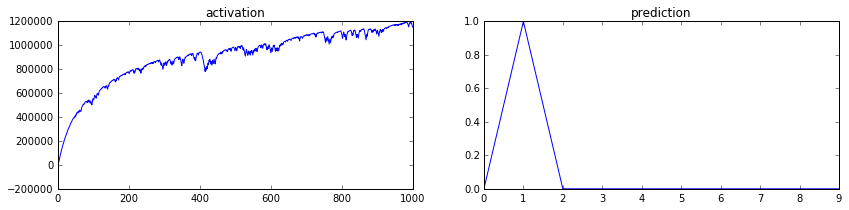

 80% ( 800 of 1000) |#################     | Elapsed Time: 0:00:01 ETA:  0:00:00

smooth rate = 0.2


 90% ( 900 of 1000) |###################   | Elapsed Time: 0:00:01 ETA:  0:00:00

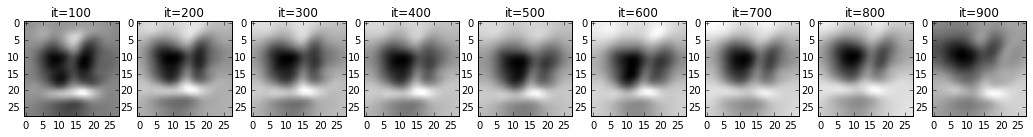

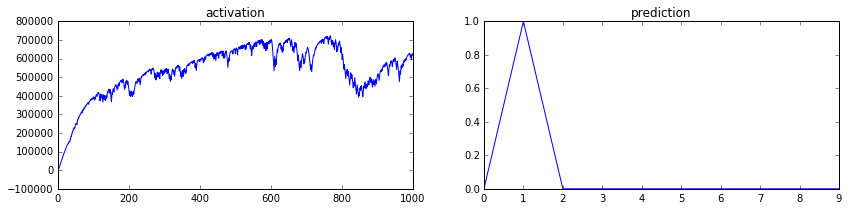

 80% ( 800 of 1000) |#################     | Elapsed Time: 0:00:01 ETA:  0:00:00

smooth rate = 0.3


 90% ( 900 of 1000) |###################   | Elapsed Time: 0:00:01 ETA:  0:00:00

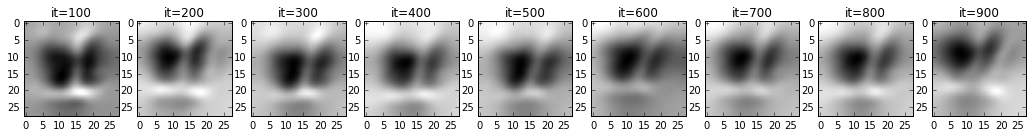

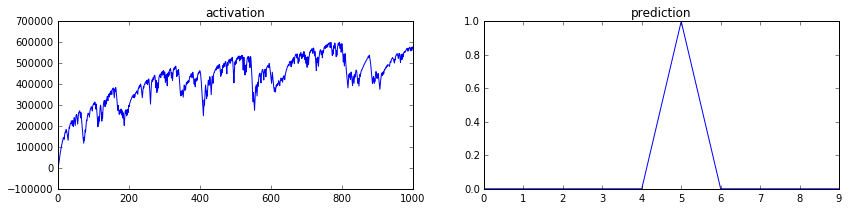

 80% ( 800 of 1000) |#################     | Elapsed Time: 0:00:01 ETA:  0:00:00

smooth rate = 0.4


 90% ( 900 of 1000) |###################   | Elapsed Time: 0:00:01 ETA:  0:00:00

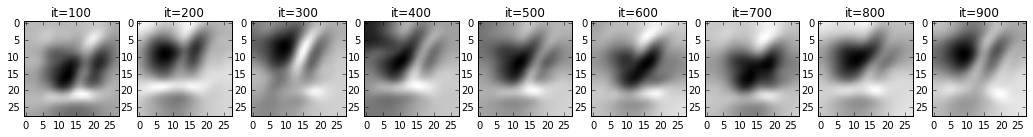

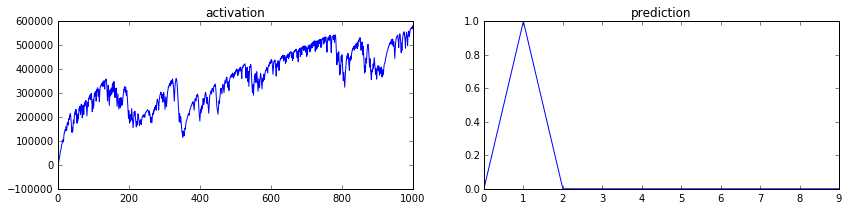

 80% ( 800 of 1000) |#################     | Elapsed Time: 0:00:01 ETA:  0:00:00

smooth rate = 0.5


 90% ( 900 of 1000) |###################   | Elapsed Time: 0:00:01 ETA:  0:00:00

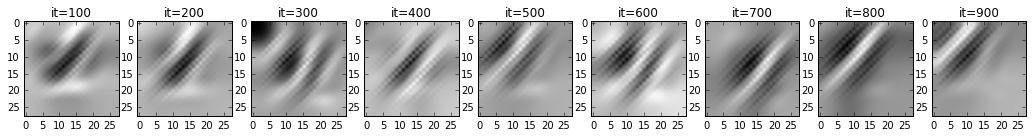

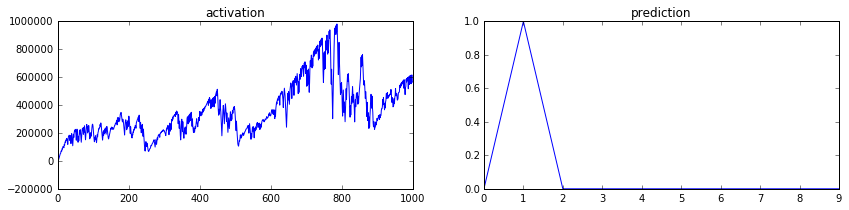

 80% ( 800 of 1000) |#################     | Elapsed Time: 0:00:01 ETA:  0:00:00

smooth rate = 0.6


 90% ( 900 of 1000) |###################   | Elapsed Time: 0:00:01 ETA:  0:00:00

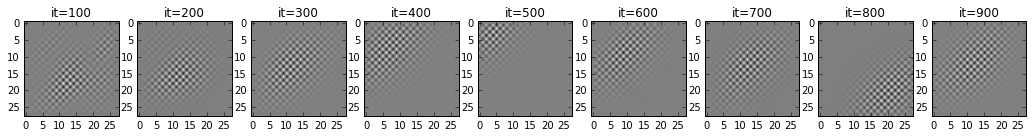

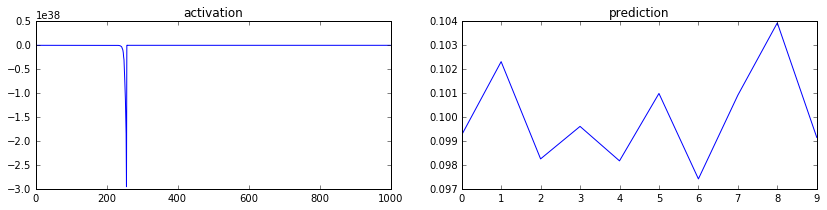

 80% ( 800 of 1000) |#################     | Elapsed Time: 0:00:01 ETA:  0:00:00

smooth rate = 0.7


 90% ( 900 of 1000) |###################   | Elapsed Time: 0:00:01 ETA:  0:00:00

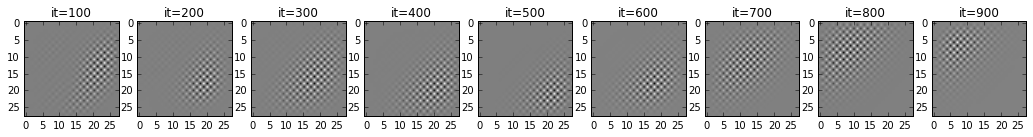

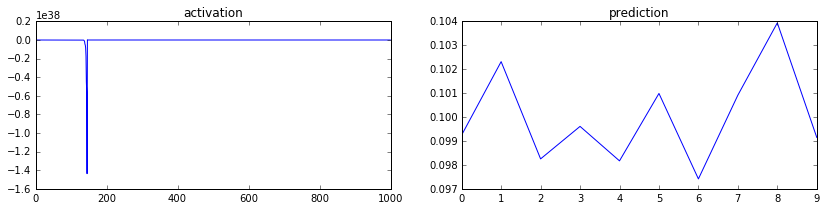

 80% ( 800 of 1000) |#################     | Elapsed Time: 0:00:01 ETA:  0:00:00

smooth rate = 0.8


 90% ( 900 of 1000) |###################   | Elapsed Time: 0:00:01 ETA:  0:00:00/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: RuntimeWarning: overflow encountered in add
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:25: RuntimeWarning: overflow encountered in add
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:27: RuntimeWarning: overflow encountered in subtract
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:21: RuntimeWarning: overflow encountered in subtract
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:22: RuntimeWarning: overflow encountered in subtract
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in subtract


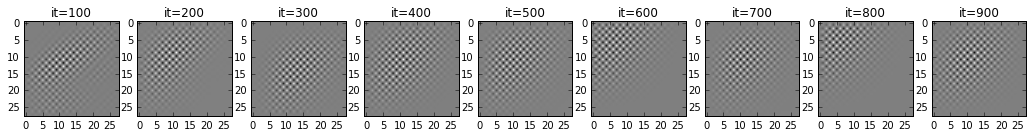

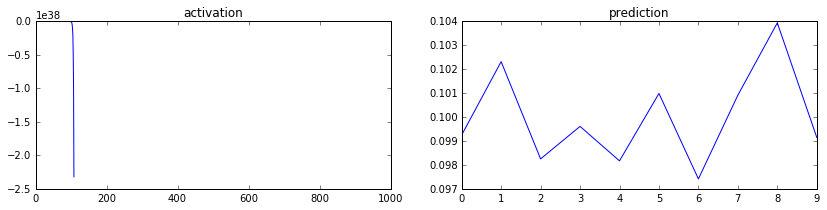

 80% ( 800 of 1000) |#################     | Elapsed Time: 0:00:01 ETA:  0:00:00

smooth rate = 0.9


 90% ( 900 of 1000) |###################   | Elapsed Time: 0:00:01 ETA:  0:00:00

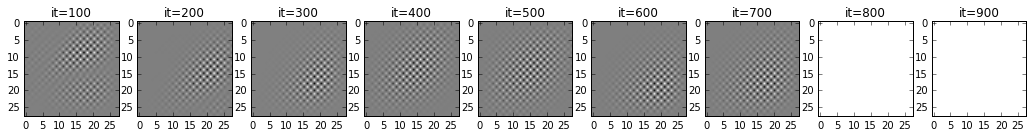

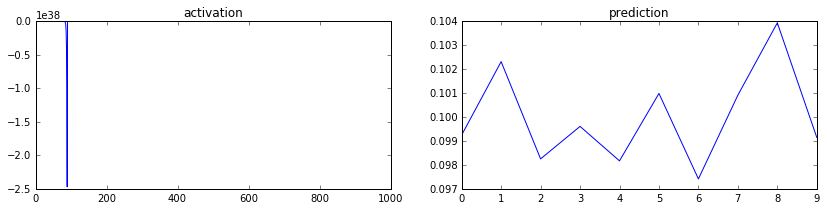

 80% ( 800 of 1000) |#################     | Elapsed Time: 0:00:01 ETA:  0:00:00

smooth rate = 1.0


 90% ( 900 of 1000) |###################   | Elapsed Time: 0:00:01 ETA:  0:00:00

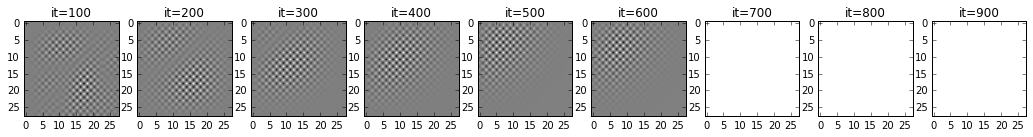

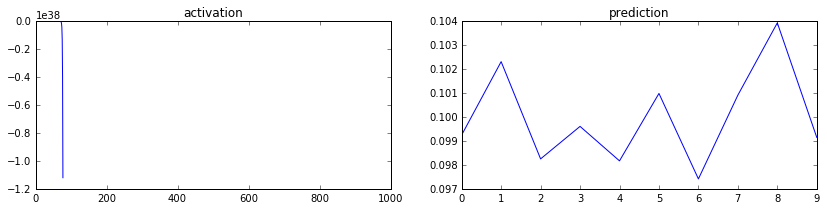

In [7]:
#EXP for smooth rate
#CONCLUSION: smr = 0 is better for char
for i in range(0,11):
    resmmth = (i)/10.0
    print "smooth rate = {}".format(resmmth)
    oneLoop(net=net,target_label=1,IT=1000,rate_obj=1000, rate_smooth=resmmth, means=0.5)

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

means = 0.0


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

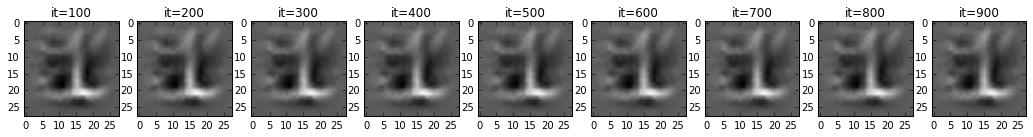

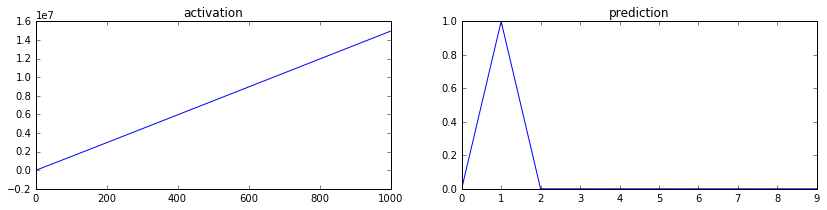

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

means = 0.1


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

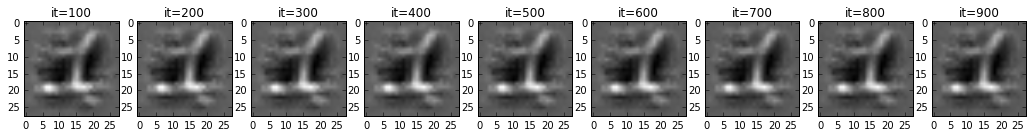

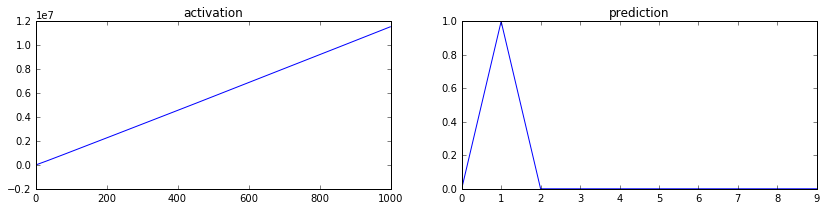

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

means = 0.2


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

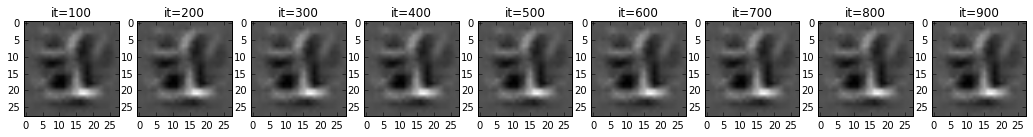

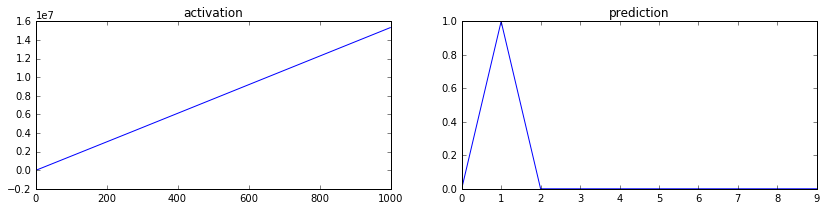

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

means = 0.3


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

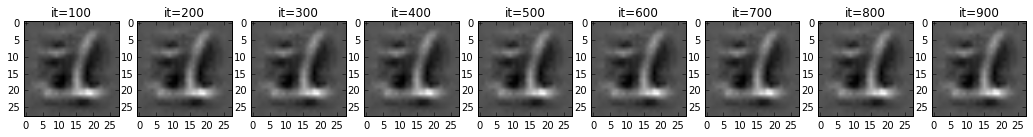

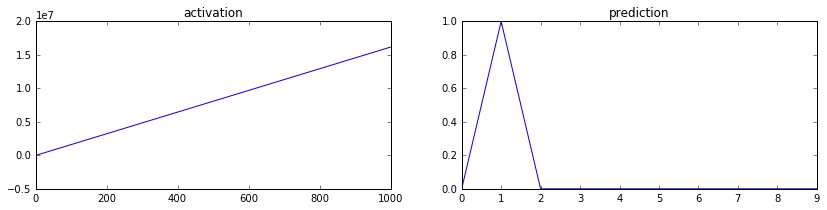

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

means = 0.4


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

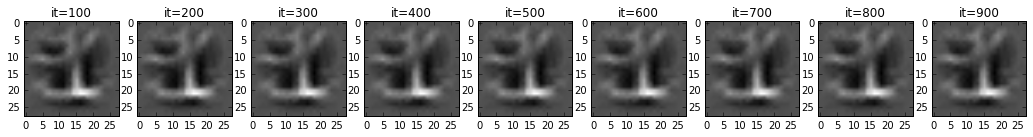

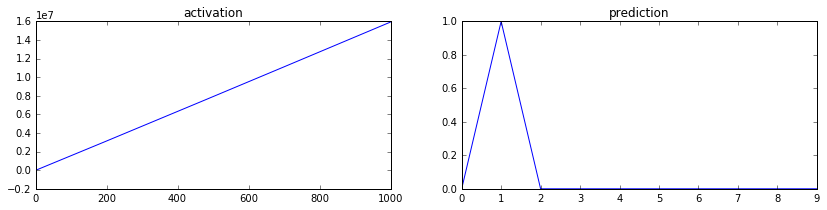

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

means = 0.5


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

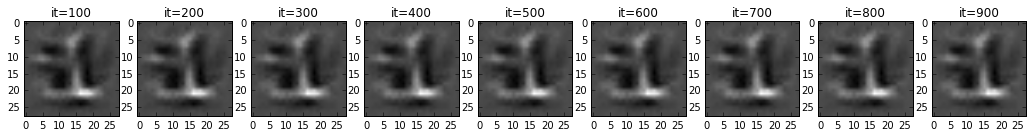

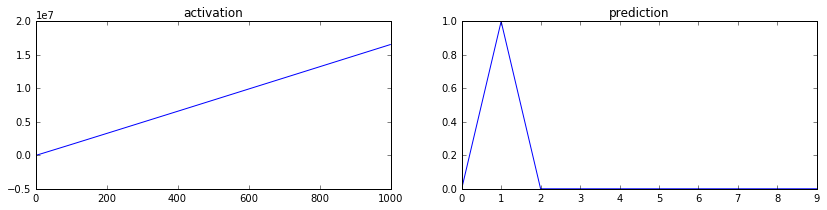

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

means = 0.6


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

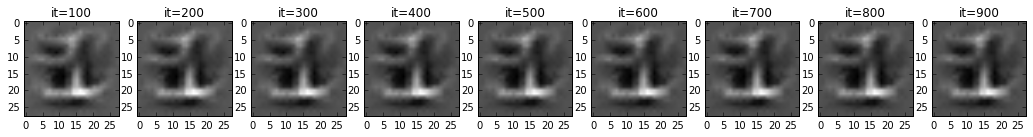

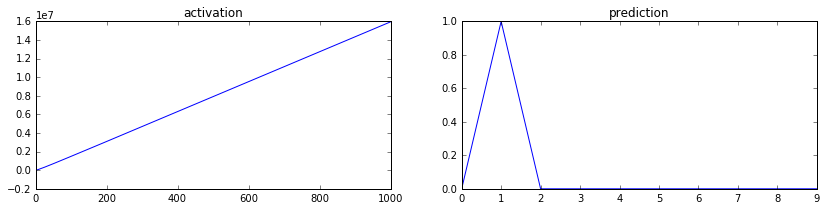

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

means = 0.7


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

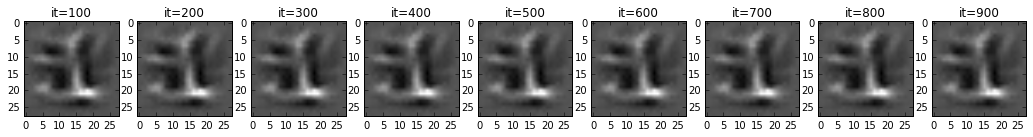

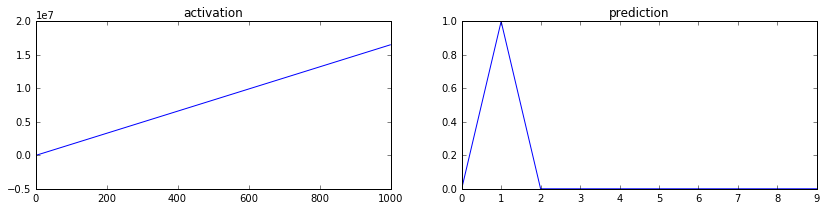

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

means = 0.8


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

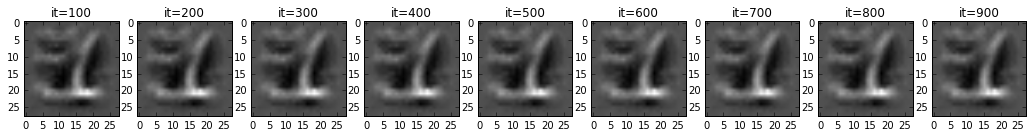

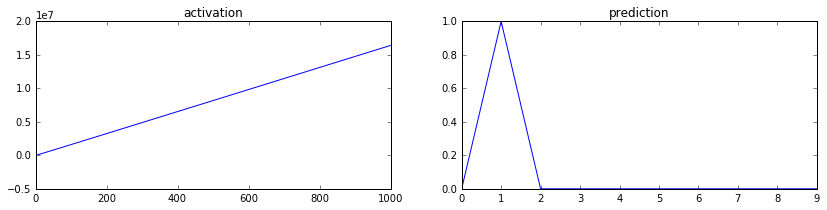

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

means = 0.9


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

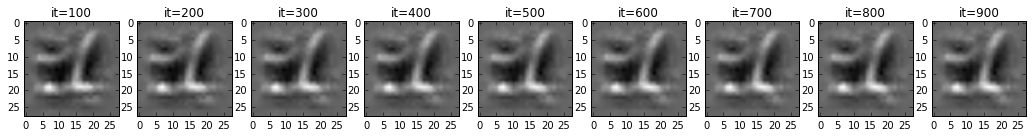

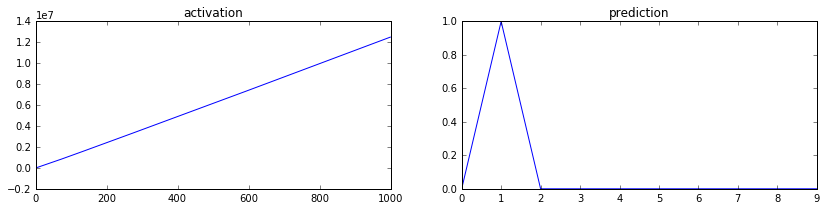

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

means = 1.0


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

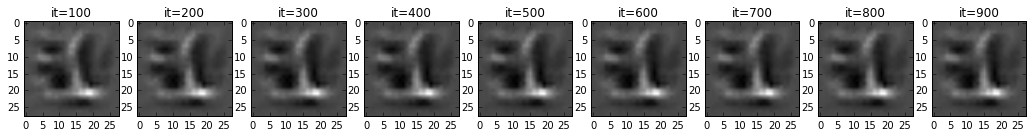

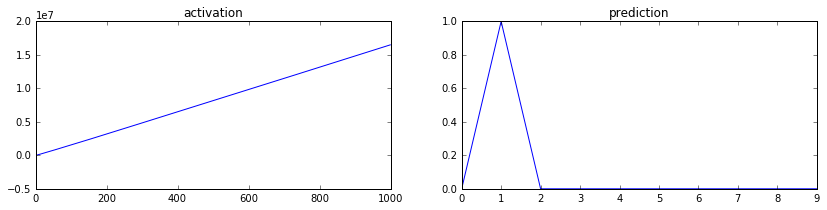

In [95]:
#EXP for means
#CONCLUSION: means has little affect on result
for i in range(0,11):
    means = i/10.0
    print "means = {}".format(means)
    oneLoop(net=net,target_label=1,IT=1000,rate_obj=1000, rate_smooth=0, means=means)

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

rt_obj = 0


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

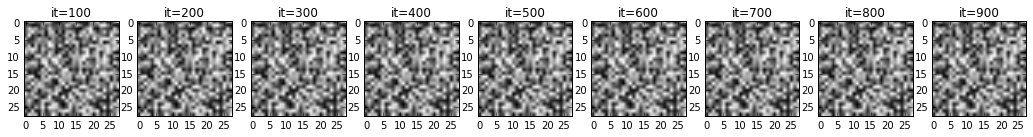

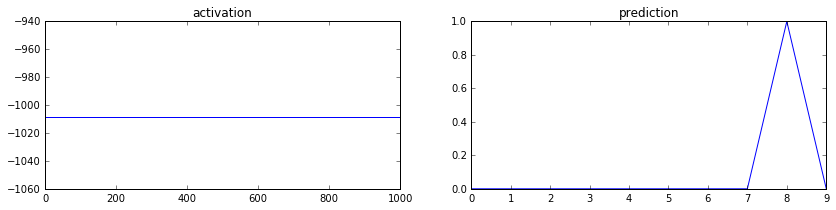

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

rt_obj = 200


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

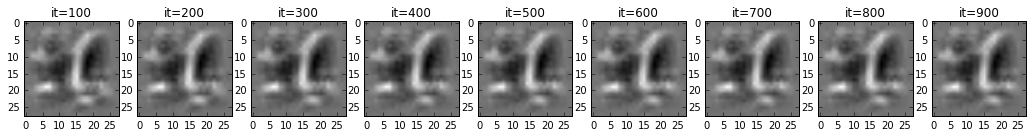

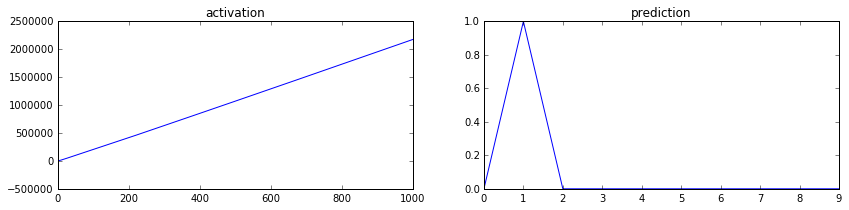

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

rt_obj = 400


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

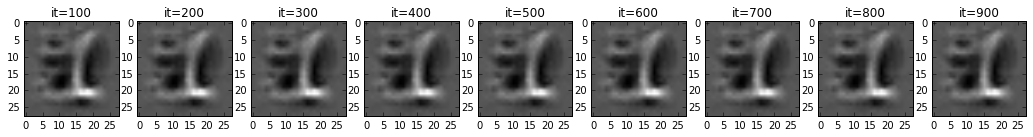

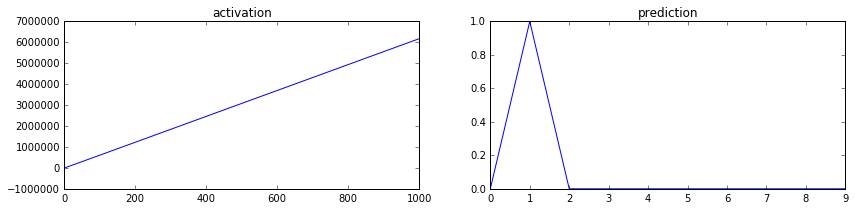

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

rt_obj = 600


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

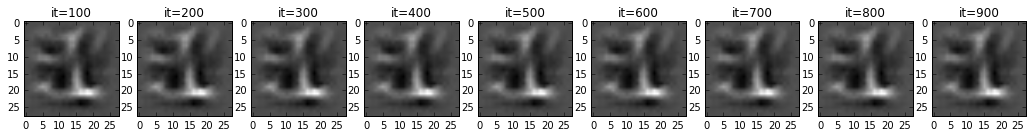

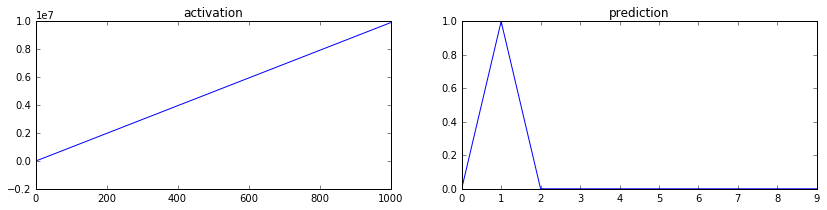

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

rt_obj = 800


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

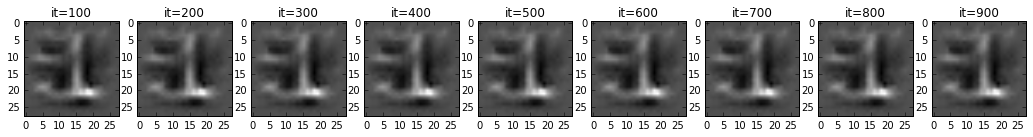

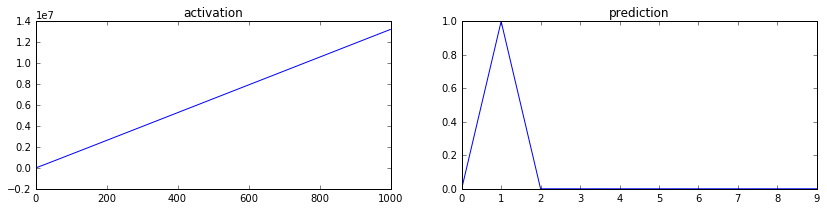

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

rt_obj = 1000


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

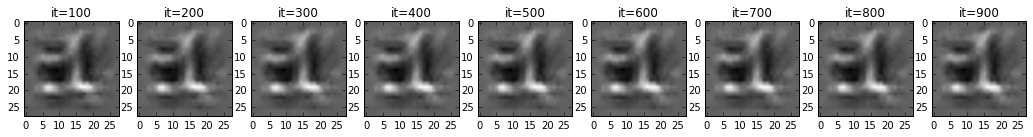

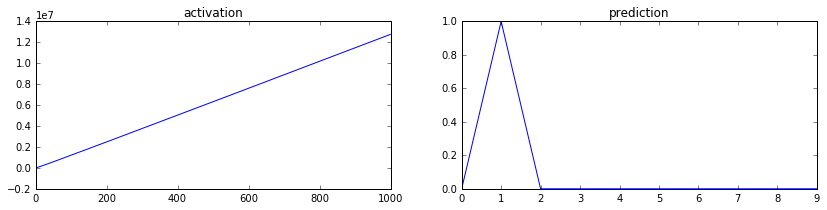

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

rt_obj = 1200


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

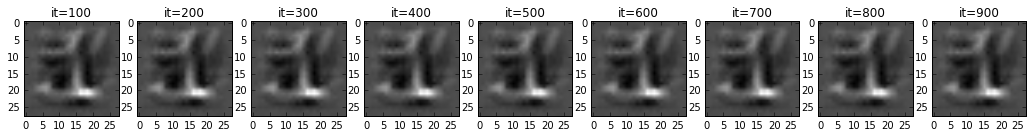

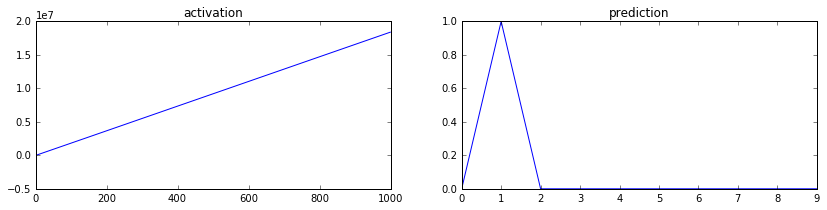

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

rt_obj = 1400


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

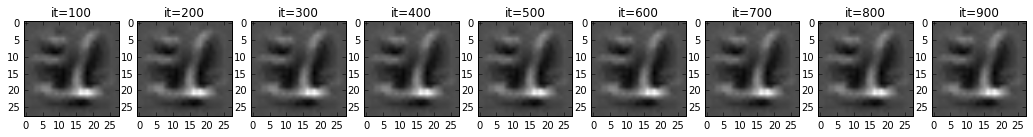

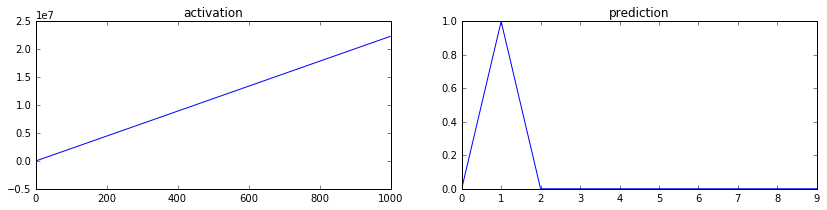

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

rt_obj = 1600


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

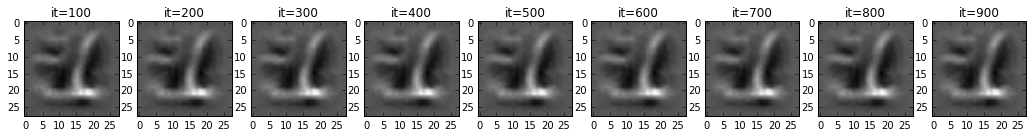

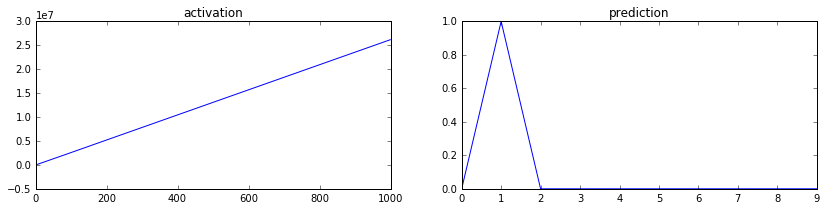

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

rt_obj = 1800


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

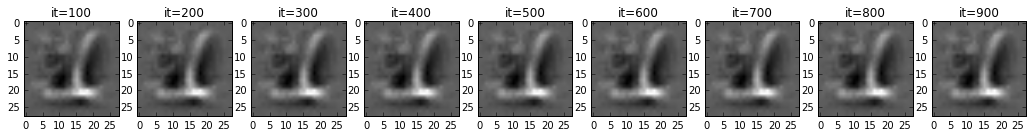

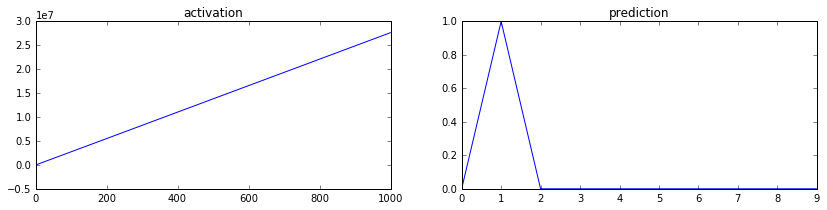

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

rt_obj = 2000


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

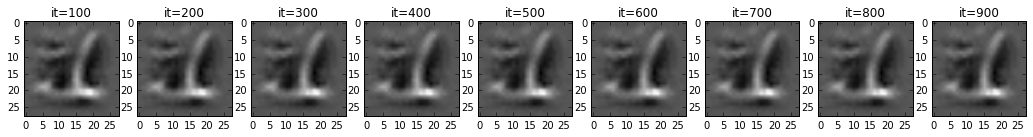

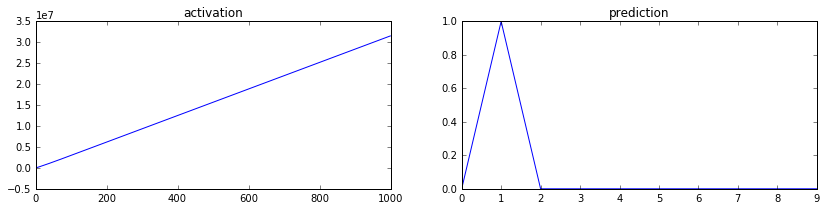

In [96]:
#EXP for rate_obj
#CONCLUSION: rate_obj > 400 will work
for i in range(0,11):
    rt = i*200
    print "rt_obj = {}".format(rt)
    oneLoop(net=net,target_label=1,IT=1000,rate_obj=rt, rate_smooth=0, means=0.3)

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.a = 0.0


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

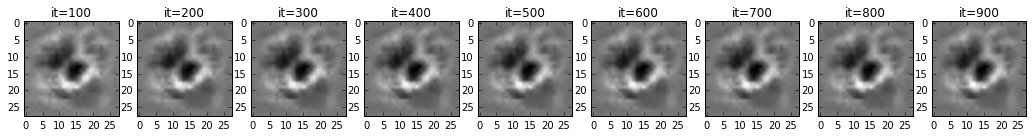

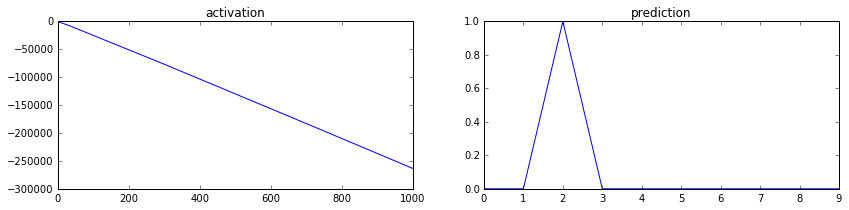

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.a = 0.5


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

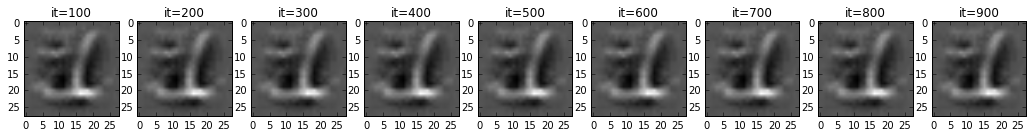

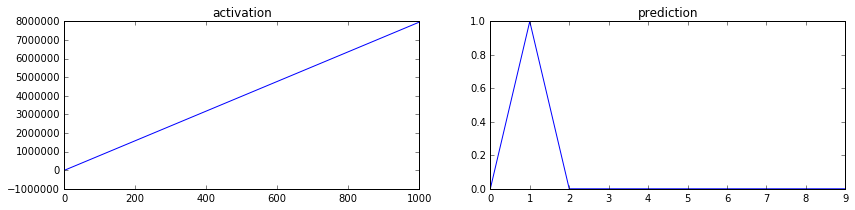

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.a = 1.0


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

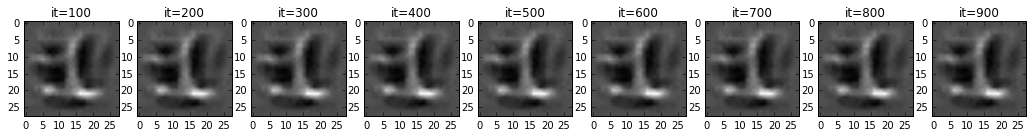

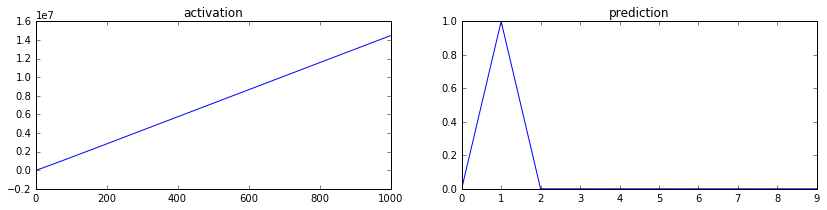

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.a = 1.5


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

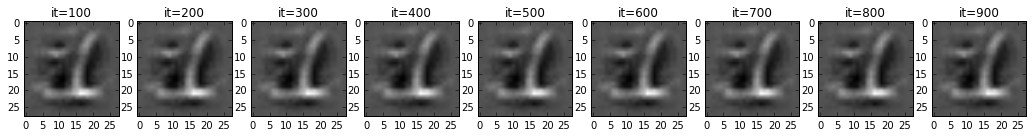

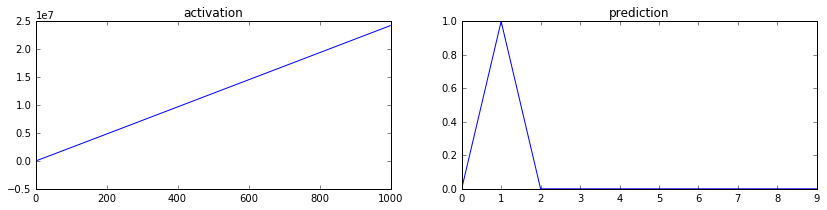

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.a = 2.0


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

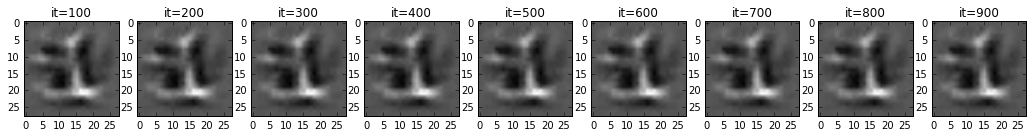

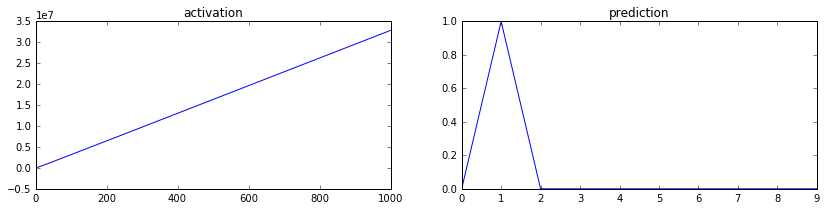

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.a = 2.5


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

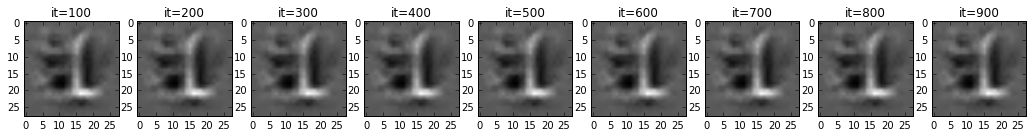

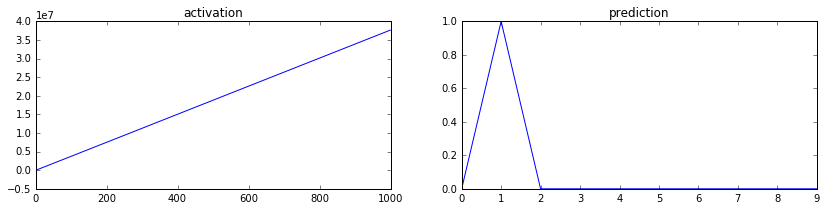

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.a = 3.0


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

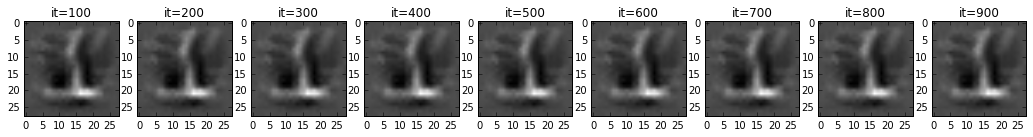

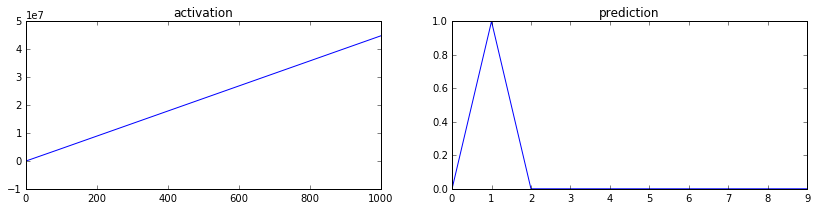

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.a = 3.5


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

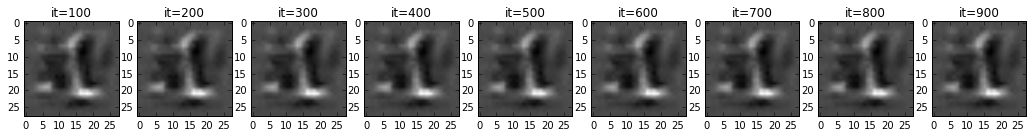

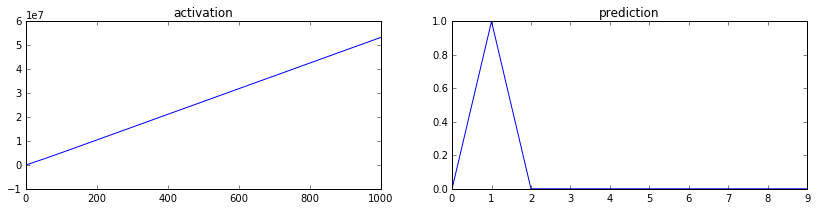

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.a = 4.0


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

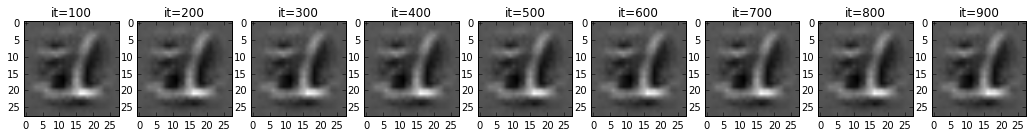

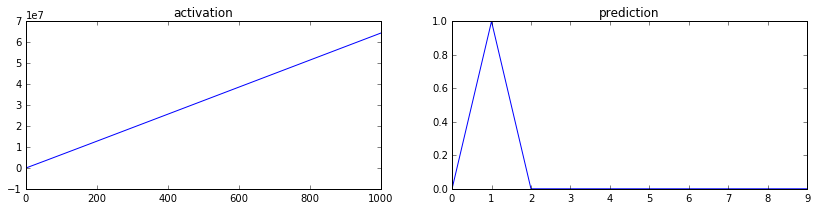

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.a = 4.5


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

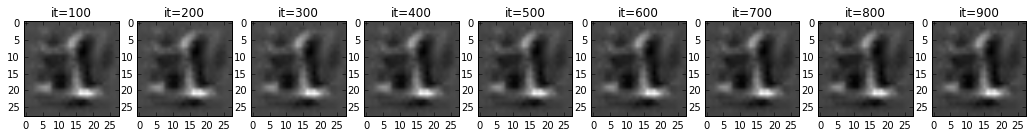

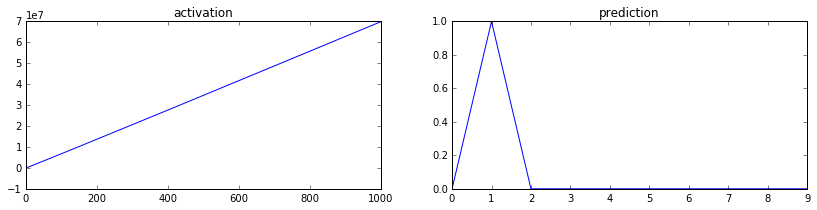

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.a = 5.0


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

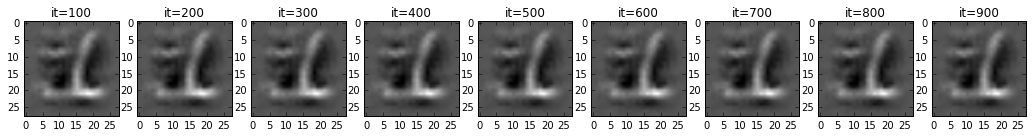

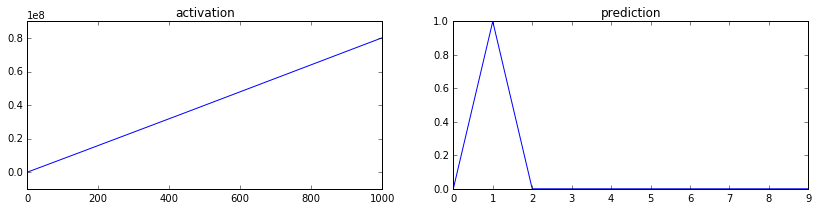

In [98]:
#EXP for a
#CONCLUSION: a = 1 is okay
for i in range(0,11):
    rt = i*0.5
    print "regression.a = {}".format(rt)
    oneLoop(net=net,target_label=1, a=rt, b=0.1)

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.b = 0.0


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

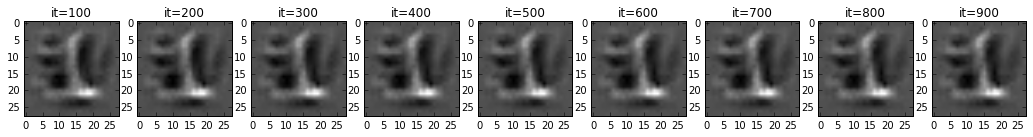

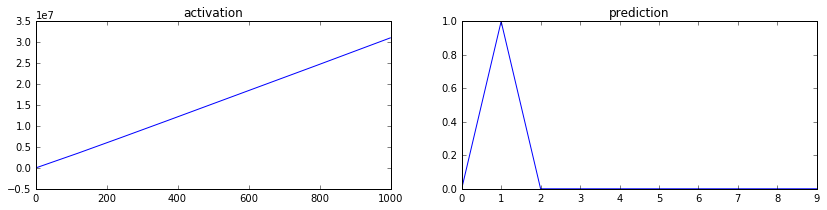

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.b = 0.1


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

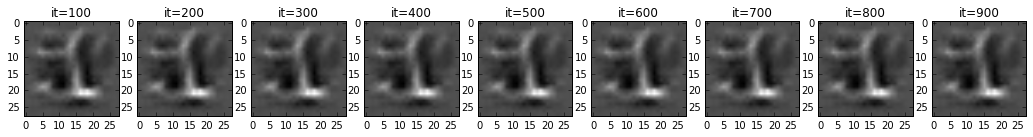

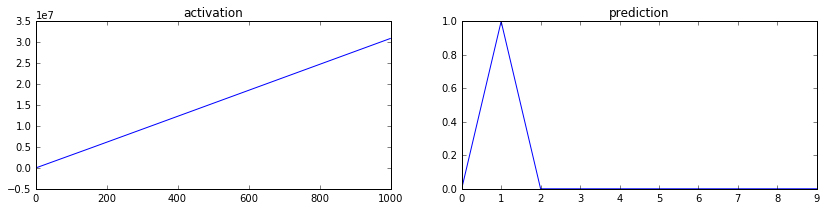

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.b = 0.2


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

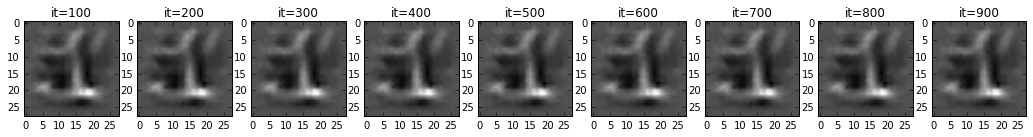

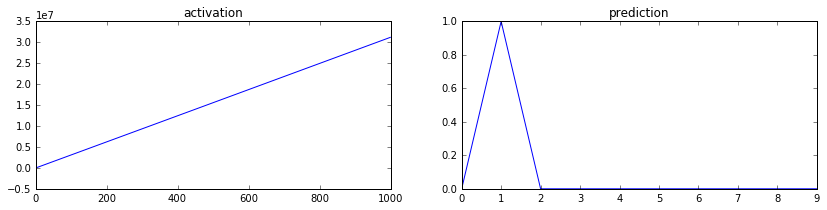

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.b = 0.3


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

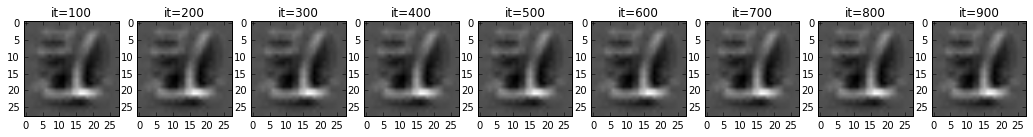

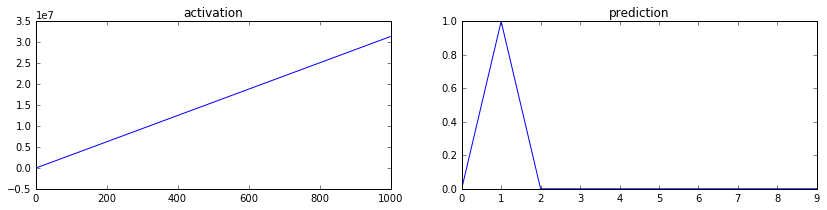

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.b = 0.4


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

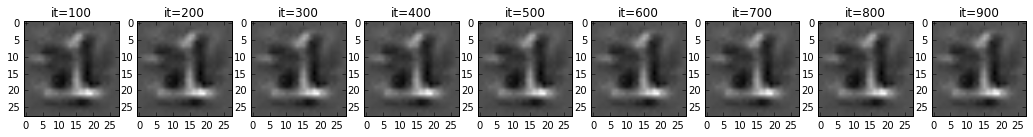

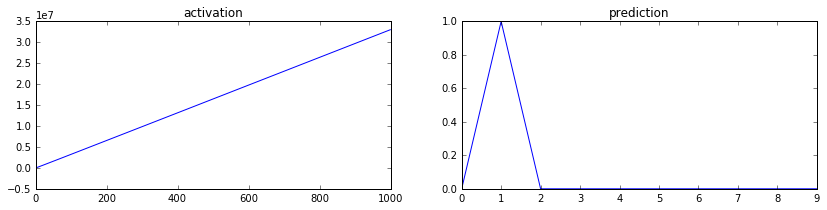

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.b = 0.5


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

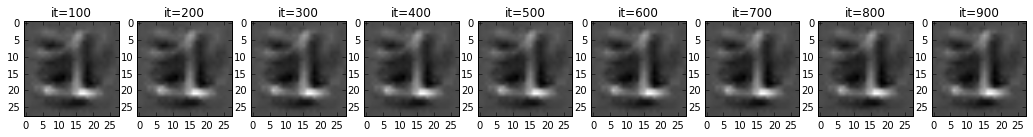

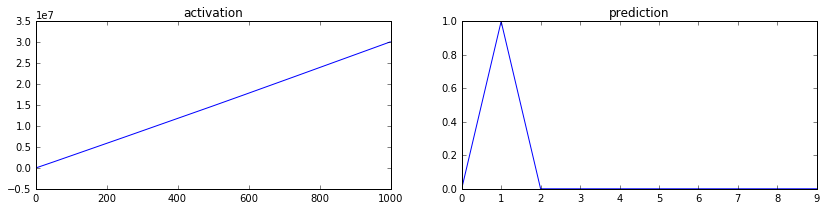

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.b = 0.6


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

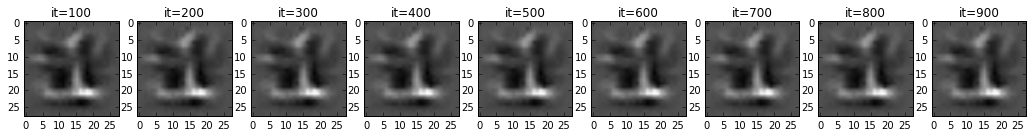

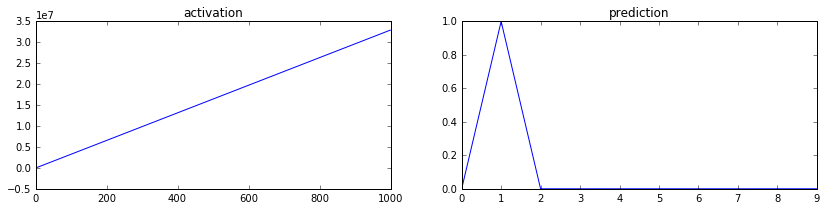

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.b = 0.7


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

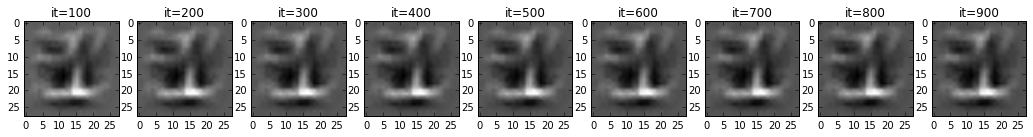

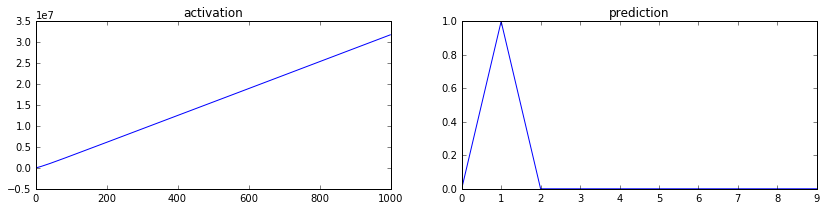

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.b = 0.8


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

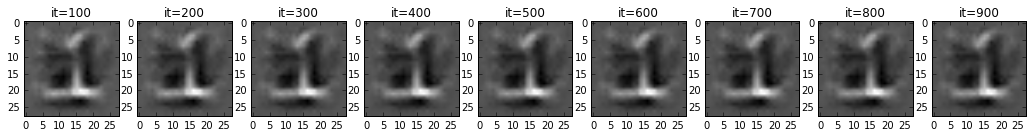

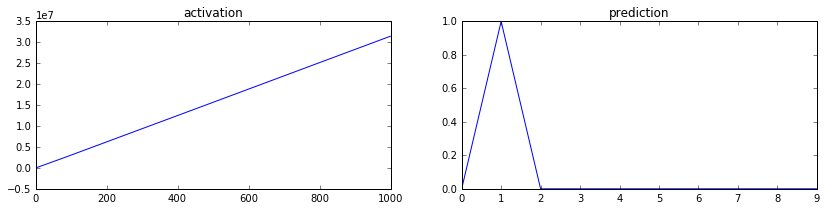

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.b = 0.9


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

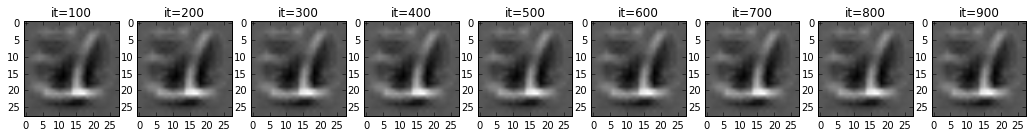

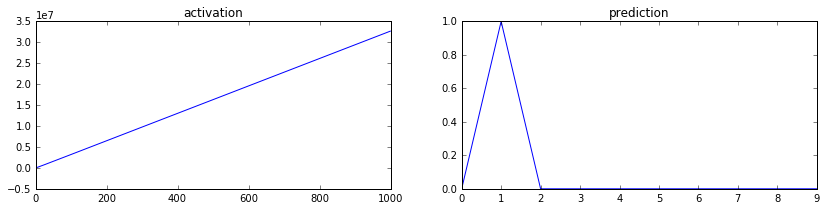

 80% ( 800 of 1000) |###############    | Elapsed Time: 0:00:01 ETA:  0:00:00

regression.b = 1.0


 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

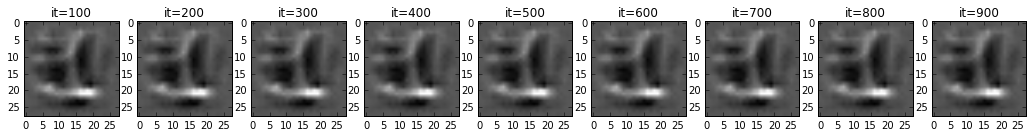

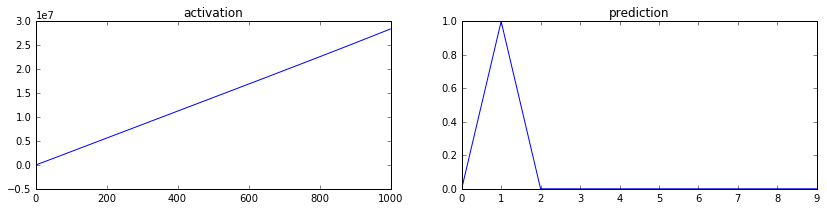

In [99]:
#EXP for b
#CONCLUSION: not very important... give it 0.5
for i in range(0,11):
    rt = i*0.1
    print "regression.b = {}".format(rt)
    oneLoop(net=net,target_label=1, a=2, b=rt)

 99% ( 9900 of 10000) |################ | Elapsed Time: 0:00:15 ETA:  0:00:00

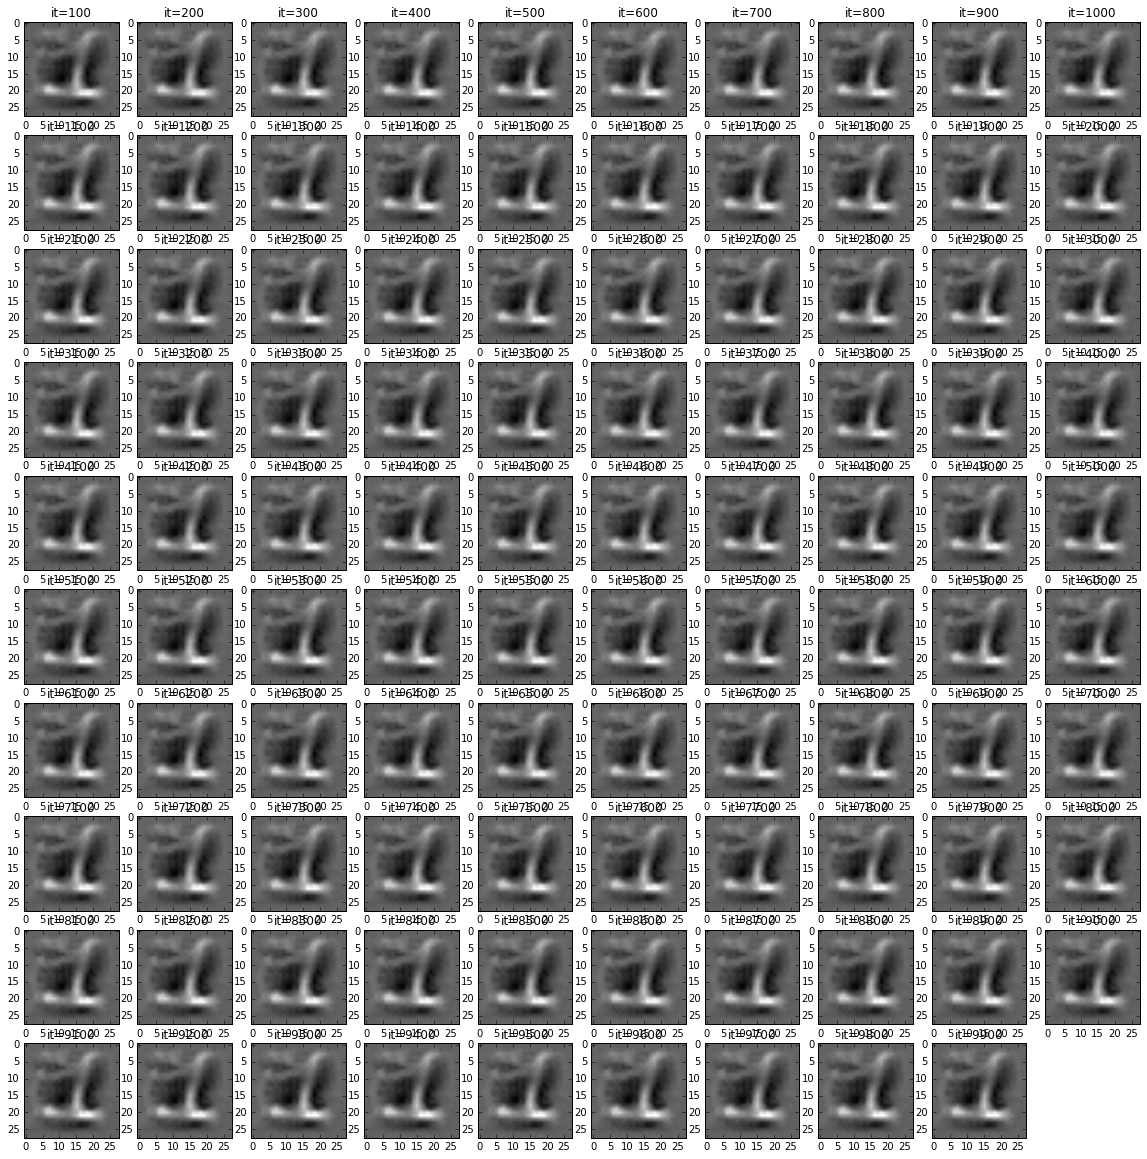

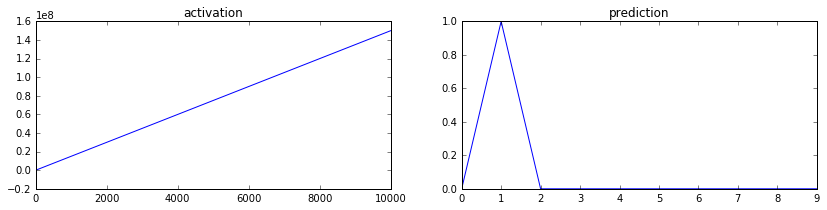

In [101]:
#run for huge loops
oneLoop(net=net,target_label=1,IT=10000)

 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

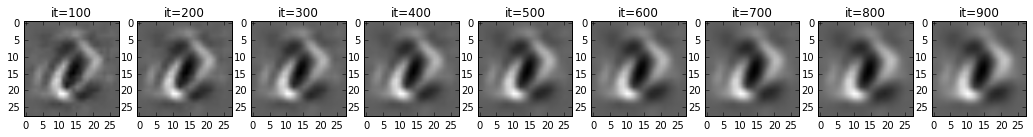

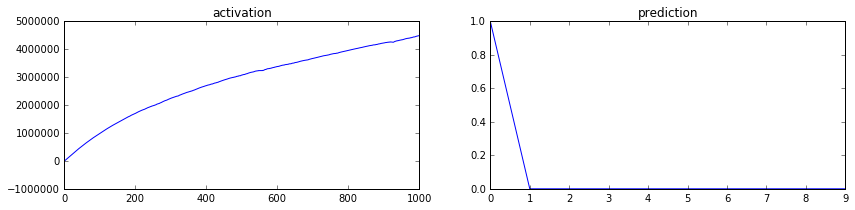

 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

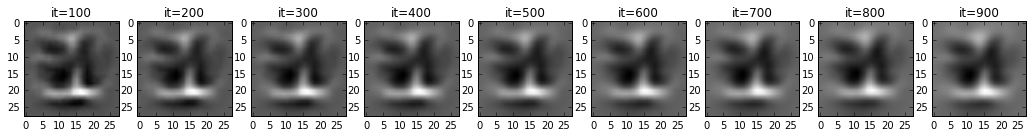

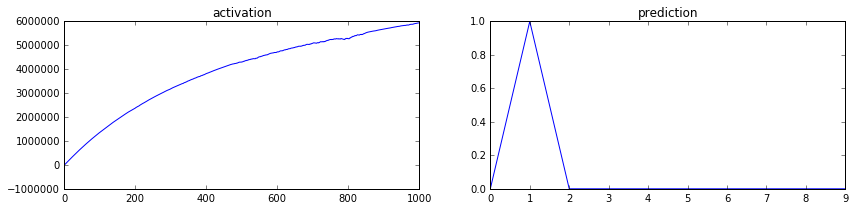

 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

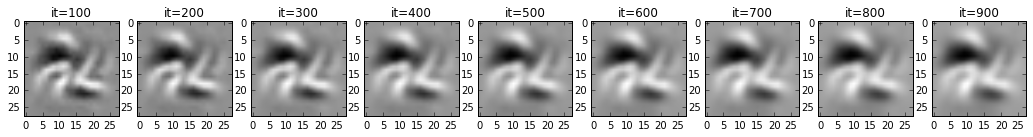

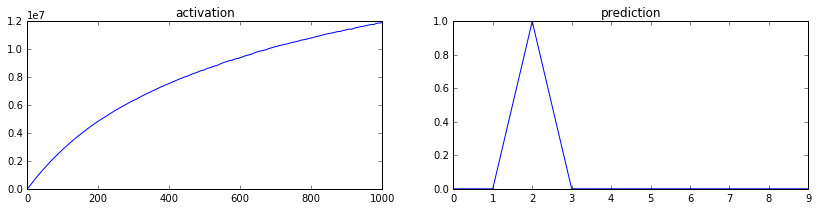

 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

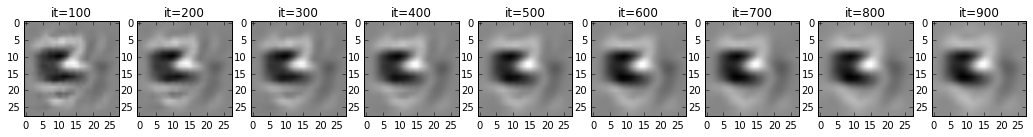

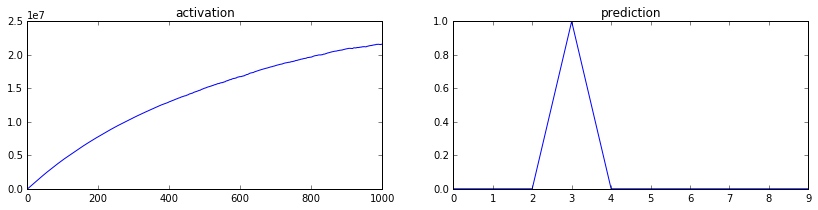

 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

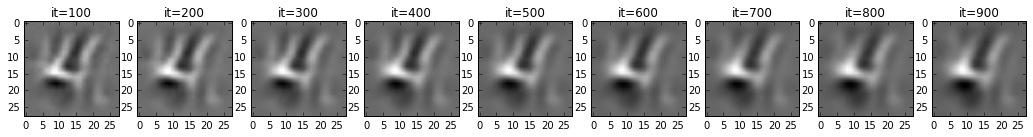

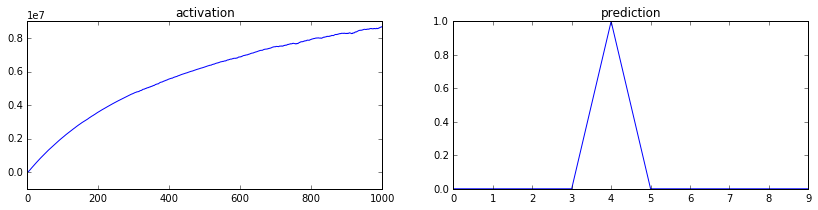

 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

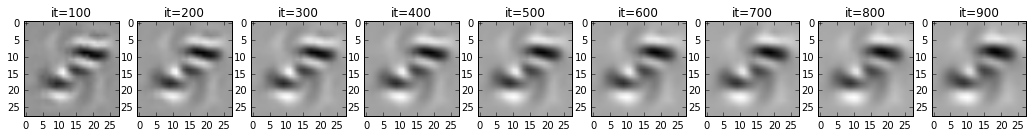

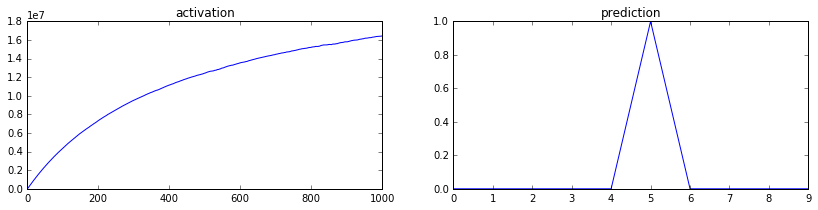

 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

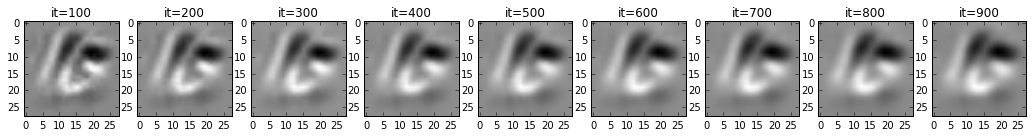

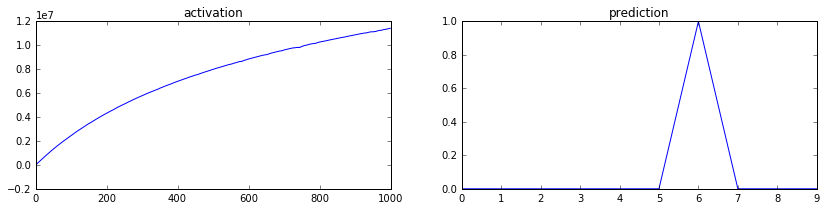

 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

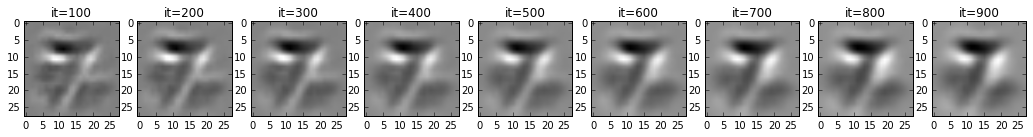

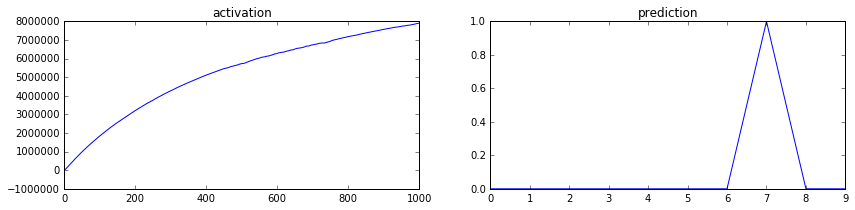

 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

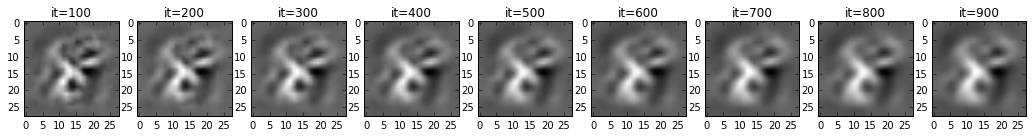

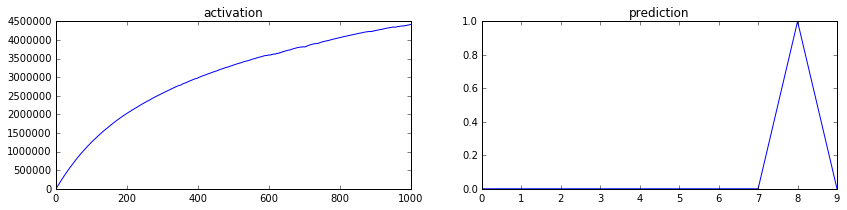

 90% ( 900 of 1000) |#################  | Elapsed Time: 0:00:01 ETA:  0:00:00

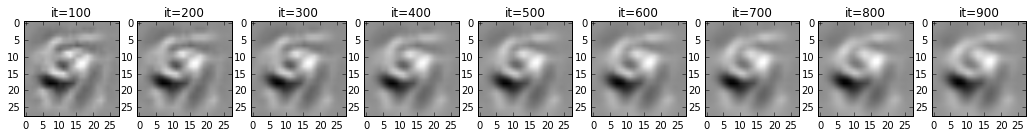

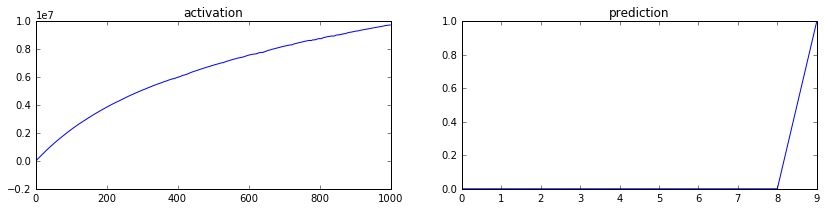

In [104]:
#run for different laels
for i in range(0,10):
    oneLoop(net=net,target_label=i, rate_smooth=0.01)

In [ ]:
record:
    1
    seems no difference
    try to add some spatial parameters?
    2
    try it on CharNet
    3
    fine-tuning for 0~9